# Demo 2: Support Vector Machine (Classification)

# Read Data

In [50]:
from sklearn import datasets

In [51]:
# Load data
digits = datasets.load_digits()

# Task 1: Visualization
Visualize some images (X) of digit with their label (y)

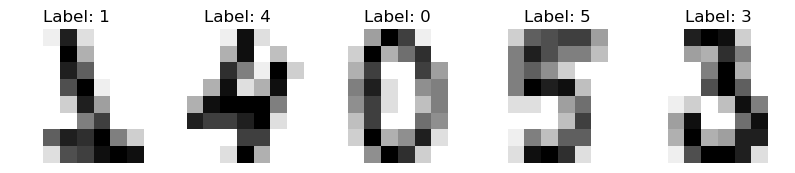

In [52]:
# Every class select one sample how to select one sample of each class?
import matplotlib.pyplot as plt

start_index = 1000

_,axes = plt.subplots(nrows=1,ncols=5,figsize = (10,3))
for ax, image, label in zip(axes,digits.images[start_index:start_index+5],digits.target[start_index:start_index+5]):
    ax.set_axis_off()
    ax.imshow(image,cmap = plt.cm.gray_r,interpolation="nearest")
    ax.set_title("Label: %i" % label)


# Task 2:  Training the model
-   In this task we will work with the Support Vector Classification model. In order to create an SVC model we have to consider which kernel we want to use.
-   In this task we will work with some kernels: Linear kernel('linear'), Radial Basis Function Kernel('rbf'), Polynomial Kernel('poly'), Sigmoid Kernel ('sigmoid'),..
-   References: [https://scikit-learn.org/stable/auto_examples/svm/plot_svm_kernels.html#sphx-glr-auto-examples-svm-plot-svm-kernels-py](Plotting decision boundaries with diferent kernels)

## Task 2.1: Defaut kernel of svc model in sklearn library: Raidal Basis Function Kernel kernel='rbf'

In [53]:
from sklearn.svm import SVC
# Create SVC model with kernel is rbf
rbf_svc = SVC(C=10,kernel='rbf')

In [54]:
# Preparing data for training rbf_svc
## flatten the images or using data (which has been flatten)
n_samples = len(digits.images)
data = digits.images.reshape((n_samples,-1))
# data = digits.data
print(data.shape)
# Each image is flatten to a vector of 8*8 = 64 components
# There are total 1797 images of digit in our dataset


(1797, 64)


In [55]:
print(data.max())
print(data.min())

16.0
0.0


In [56]:
X = data/16
y = digits.target

### Task 2.1.1: Train Test split


In [57]:
from sklearn.model_selection import train_test_split

In [58]:
# Split data into 80% train and 20% test subsets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=False)

In [59]:
print("Number of samples in the train subset:", len(y_train))
print("Number of samples in the test subset:", len(y_test))

Number of samples in the train subset: 1437
Number of samples in the test subset: 360


In [60]:
rbf_svc.fit(X_train,y_train)


SVC(C=10)

In [61]:
pred_test_rbf_10 = rbf_svc.predict(X_test)

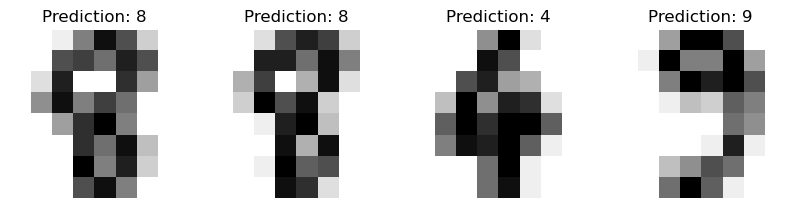

In [62]:
# Visualize the first 4 test samples and show their predicted digit value in the title.
_,axes = plt.subplots(nrows = 1,ncols = 4, figsize= (10,4))
for ax, image, prediction in zip(axes,X_test[100:100+4],pred_test_rbf_10[100:100+4]):
    ax.set_axis_off()
    image = image.reshape((8,8))
    ax.imshow(image, cmap = plt.cm.gray_r, interpolation = "nearest")
    ax.set_title(f"Prediction: {prediction}")

In [63]:
# Classification report:
from sklearn import metrics
print(f"Classification report for classifier {rbf_svc}:\n"
      f"{metrics.classification_report(y_test,pred_test_rbf_10)}\n")

Classification report for classifier SVC(C=10):
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.95      1.00      0.97        36
           2       1.00      1.00      1.00        35
           3       1.00      0.86      0.93        37
           4       0.97      0.92      0.94        37
           5       0.93      1.00      0.96        37
           6       1.00      1.00      1.00        37
           7       0.95      1.00      0.97        36
           8       0.88      0.91      0.90        33
           9       0.92      0.92      0.92        37

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360




Confusion matrix:
[[34  0  0  0  1  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 32  0  2  0  0  3  0]
 [ 0  0  0  0 34  0  0  0  0  3]
 [ 0  0  0  0  0 37  0  0  0  0]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  2  0  0  0  0  0  1 30  0]
 [ 0  0  0  0  0  1  0  1  1 34]]


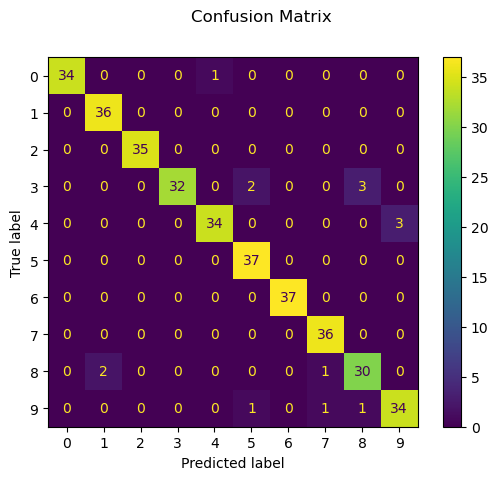

In [64]:
# Confusion matrix
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test,pred_test_rbf_10)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

In [65]:
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test,pred_test_rbf_10)

In [66]:
print(acc_score)

0.9583333333333334


In [67]:
# Same kernel with different C
Cs = [0.1,1,10,100,1000]
import time
def evaluate_rbf_svc(X_train,y_train,X_test,y_test,C):
    rbf_svc = SVC(C=C,kernel='rbf')
    start_time = time.time()
    rbf_svc.fit(X_train,y_train)
    end_time = time.time()
    train_time = end_time - start_time
    pred_test = rbf_svc.predict(X_test)
    return accuracy_score(y_test,pred_test),train_time

In [68]:
acc_score_holder = []
train_time_holder = []
for C in Cs:
    acc_score,train_time = evaluate_rbf_svc(X_train=X_train,
                                            y_train=y_train,
                                            X_test=X_test,
                                            y_test=y_test,
                                            C = C)
    acc_score_holder.append(acc_score)
    train_time_holder.append(train_time)

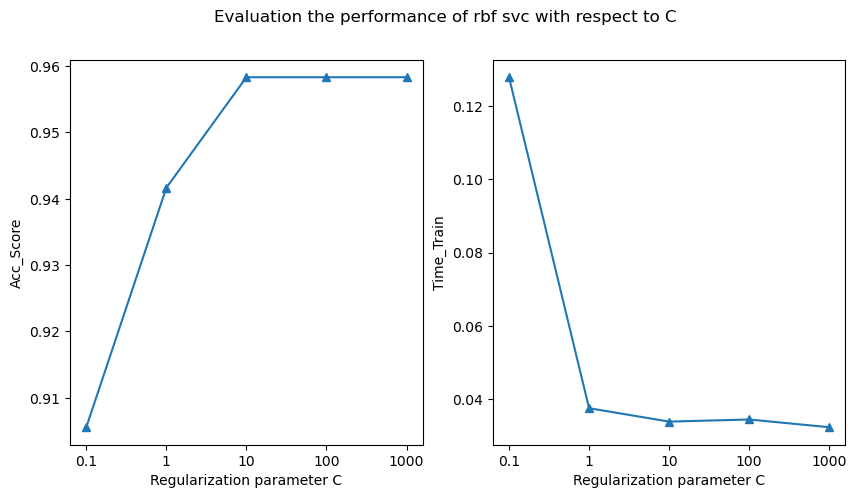

In [69]:
# Plot results to evaluate
CategoricalCs = [f'{C}' for C in Cs]
fig, ax = plt.subplots(1,2,figsize=(10,5))
fig.suptitle('Evaluation the performance of rbf svc with respect to C')

ax[0].plot(CategoricalCs,acc_score_holder,marker='^')

ax[0].set_ylabel("Acc_Score")
ax[0].set_xlabel("Regularization parameter C")

ax[1].plot(CategoricalCs,train_time_holder,marker='^')
ax[1].set_xlabel("Regularization parameter C")
ax[1].set_ylabel("Time_Train")
plt.show()

### Task 2.1.2 Cross Validation

In [70]:
from sklearn.model_selection import cross_val_score
def evaluate_rbf_SVC_CrossVal(X,y,C,kfold=10):
    rbf_svc = SVC(C=C,kernel='rbf')
    return cross_val_score(rbf_svc,X,y,cv=kfold).mean()


In [71]:
Cs = [0.1,1,10,100,1000]
score_holder = []
for C in Cs:
    score_holder.append(evaluate_rbf_SVC_CrossVal(X=X,y=y,C=C))

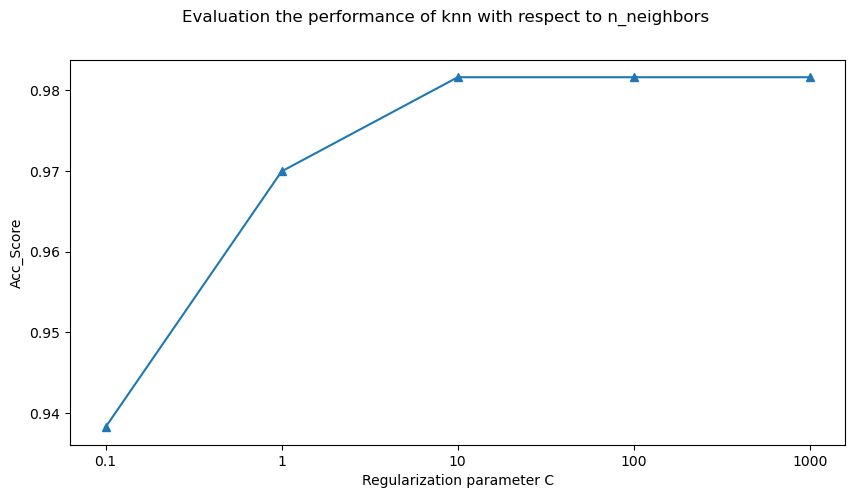

In [72]:
# Plot results to evaluate
CategoricalCs = [f'{C}' for C in Cs]
fig, ax = plt.subplots(1,figsize=(10,5))
fig.suptitle('Evaluation the performance of knn with respect to n_neighbors')

ax.plot(CategoricalCs,score_holder,marker='^')

ax.set_ylabel("Acc_Score")
ax.set_xlabel("Regularization parameter C")

plt.show()

## Task 2.2 Linear Kernel kernel = 'linear'

In [73]:
# Create SVC model with kernel is linear
linear_svc = SVC(C=10,kernel='linear')

In [74]:
# Training for the linear SVC model
linear_svc.fit(X_train,y_train)
# Prediction on the test set
pred_test_linear = linear_svc.predict(X_test)

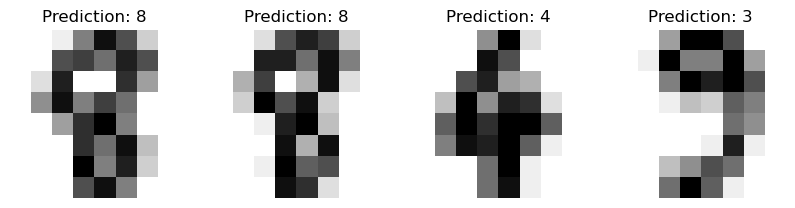

In [75]:
# Visualize the first 4 test samples and show their predicted digit value in the title.
_,axes = plt.subplots(nrows = 1,ncols = 4, figsize= (10,4))
for ax, image, prediction in zip(axes,X_test[100:100+4],pred_test_linear[100:100+4]):
    ax.set_axis_off()
    image = image.reshape((8,8))
    ax.imshow(image, cmap = plt.cm.gray_r, interpolation = "nearest")
    ax.set_title(f"Prediction: {prediction}")

In [76]:
# Same kernel with different C
Cs = [0.1,1,10,100,1000]
import time
def evaluate_linear_svc(X_train,y_train,X_test,y_test,C):
    linear_svc = SVC(C=C,kernel='linear')
    start_time = time.time()
    linear_svc.fit(X_train,y_train)
    end_time = time.time()
    train_time = end_time - start_time
    pred_test = rbf_svc.predict(X_test)
    return accuracy_score(y_test,pred_test),train_time

In [77]:
acc_score_holder = []
train_time_holder = []
for C in Cs:
    acc_score,train_time = evaluate_linear_svc(X_train=X_train,
                                            y_train=y_train,
                                            X_test=X_test,
                                            y_test=y_test,
                                            C = C)
    acc_score_holder.append(acc_score)
    train_time_holder.append(train_time)


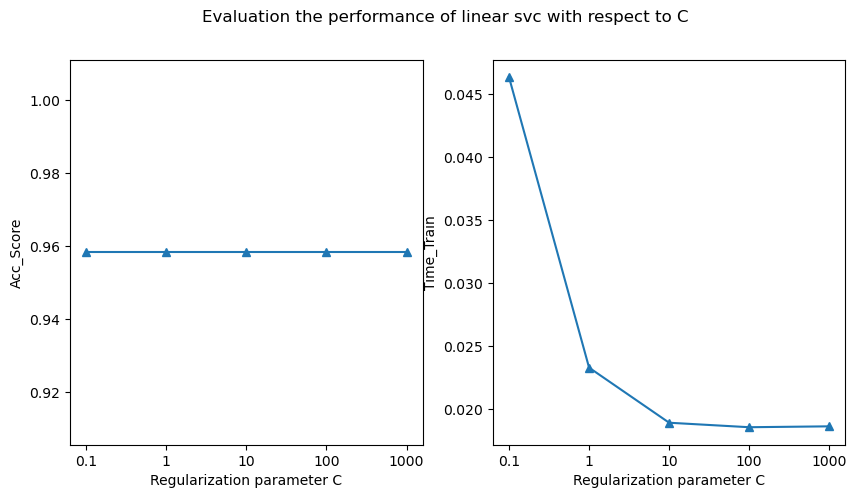

In [78]:
# Plot results to evaluate
CategoricalCs = [f'{C}' for C in Cs]
fig, ax = plt.subplots(1,2,figsize=(10,5))
fig.suptitle('Evaluation the performance of linear svc with respect to C')

ax[0].plot(CategoricalCs,acc_score_holder,marker='^')

ax[0].set_ylabel("Acc_Score")
ax[0].set_xlabel("Regularization parameter C")

ax[1].plot(CategoricalCs,train_time_holder,marker='^')
ax[1].set_xlabel("Regularization parameter C")
ax[1].set_ylabel("Time_Train")
plt.show()

## Task 3: Make comparision of four kernels

In [79]:
def evaluate_svc(X_train,y_train,X_test,y_test,C,kernel):
    eval_svc = SVC(C = C, kernel=kernel)
    
    eval_svc.fit(X_train,y_train)
    pred_test = eval_svc.predict(X_test)
    return metrics.classification_report(y_test,pred_test,output_dict=True)

In [80]:
kernel = "linear"
C = 10
report_1 = evaluate_svc(X_train,y_train,X_test,y_test,C,kernel=kernel)


In [92]:
print(list(report_1["macro avg"].values())[:3])

[0.9319264388014388, 0.9304147654147652, 0.9300488085719418]


### Create a table store results from different kernels

In [83]:
import pandas as pd

In [104]:
columns_name = {"kernel":[],
                "C":[],
                "precision":[],
                "recall":[],
                "f1-score":[]}
df_allresults = pd.DataFrame(columns=columns_name)

In [99]:
row = ['linear']
for e in list(report_1["macro avg"].values())[:3]:
    row.append(e)

In [102]:
df_allresults.loc[len(df_allresults)] = row

In [105]:
df_allresults

,kernel,C,precision,recall,f1-score


In [119]:
kernels = ["linear","rbf","poly","sigmoid"]
Cs = [1, 5, 10, 100 ,1000]

In [121]:
df_allresults = pd.DataFrame(columns=columns_name)
CategoricalCs = [f'{C}' for C in Cs]
for C in CategoricalCs:
    for kernel in kernels:
        row = [kernel,C]
        report = evaluate_svc(X_train=X_train,
                              X_test=X_test,
                              y_train=y_train,
                              y_test=y_test,
                              C=float(C),
                              kernel = kernel)
        for e in list(report["macro avg"].values())[:3]:
            row.append(e)
        df_allresults.loc[len(df_allresults)] = row

In [122]:
df_allresults.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   kernel     20 non-null     object 
 1   C          20 non-null     object 
 2   precision  20 non-null     float64
 3   recall     20 non-null     float64
 4   f1-score   20 non-null     float64
dtypes: float64(3), object(2)
memory usage: 960.0+ bytes


In [136]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

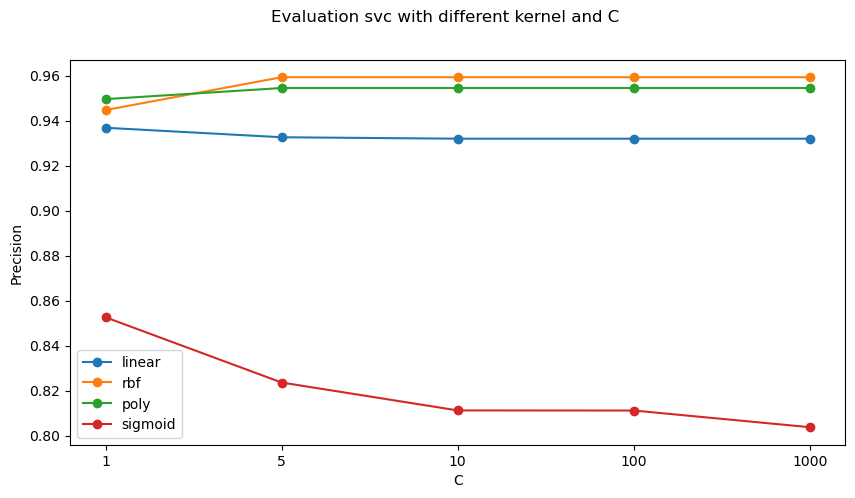

In [143]:
from matplotlib import pyplot as plt
import matplotlib
fig,ax = plt.subplots(figsize=(10,5))
for kernel_type in df_allresults["kernel"].unique():
    ax.plot(
        df_allresults[df_allresults['kernel']==kernel_type]['C'],
        df_allresults[df_allresults["kernel"]==kernel_type]["precision"],
        marker='o',label=kernel_type
    )
ax.legend(frameon= True)
ax.set_xlabel("C")
ax.set_ylabel("Precision")
fig.suptitle("Evaluation precision of svc model with different kernel and C")
plt.show()

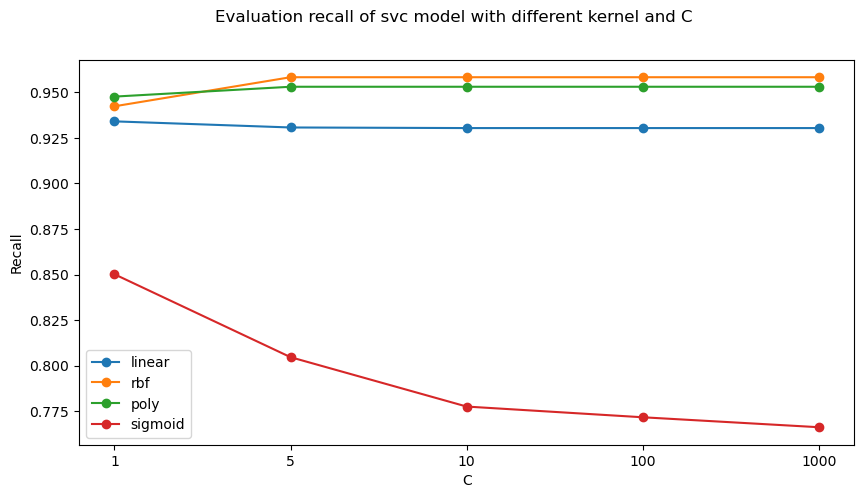

In [145]:
from matplotlib import pyplot as plt
import matplotlib
fig,ax = plt.subplots(figsize=(10,5))
for kernel_type in df_allresults["kernel"].unique():
    ax.plot(
        df_allresults[df_allresults['kernel']==kernel_type]['C'],
        df_allresults[df_allresults["kernel"]==kernel_type]["recall"],
        marker='o',label=kernel_type
    )
ax.legend(frameon= True)
ax.set_xlabel("C")
ax.set_ylabel("Recall")
fig.suptitle("Evaluation recall of svc model with different kernel and C")
plt.show()

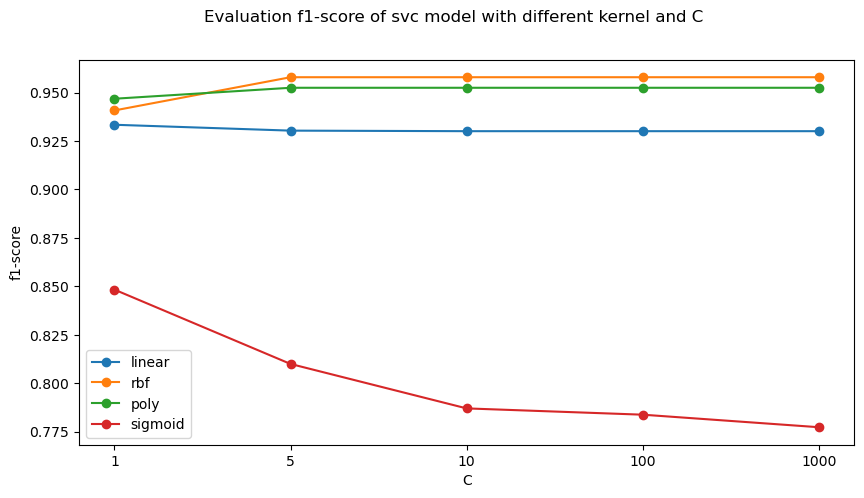

In [146]:
from matplotlib import pyplot as plt
import matplotlib
fig,ax = plt.subplots(figsize=(10,5))
for kernel_type in df_allresults["kernel"].unique():
    ax.plot(
        df_allresults[df_allresults['kernel']==kernel_type]['C'],
        df_allresults[df_allresults["kernel"]==kernel_type]["f1-score"],
        marker='o',label=kernel_type
    )
ax.legend(frameon= True)
ax.set_xlabel("C")
ax.set_ylabel("f1-score")
fig.suptitle("Evaluation f1-score of svc model with different kernel and C")
plt.show()

# Select the best model
-   Kernel: rbf
-   C: 10